## Introduction:
The Titanic dataset encapsulates the demographic details of passengers on the ill-fated maiden voyage of RMS Titanic in 1912. This Exploratory Data Analysis (EDA) endeavors to uncover patterns and insights within the dataset, shedding light on the factors influencing survival rates. By delving into passenger profiles, we aim to discern how variables such as class, gender, age, and family connections played a role in determining the likelihood of survival. Through statistical analysis and visualizations, we seek to capture a nuanced understanding of this historic event, paying homage to the individuals who were part of the tragedy and exploring the enduring significance of the Titanic disaster.

## Loading Data and Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("data/train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Exploration


In [5]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Univariate Analysis

In [7]:
print(df["Survived"].value_counts(normalize=True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


- Only 38% of the passengers survived.

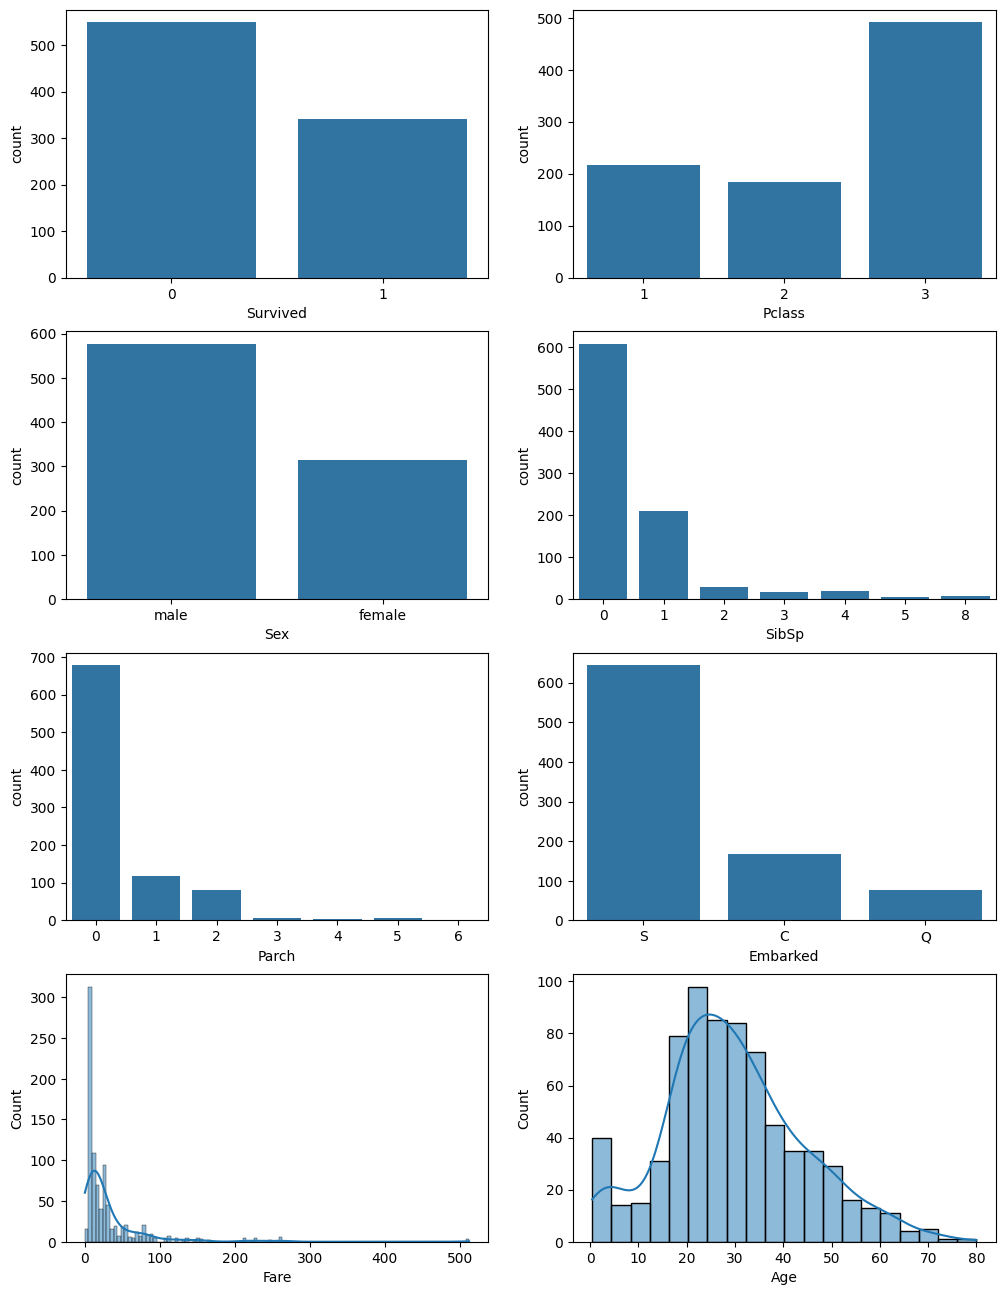

In [8]:
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

for i, column in enumerate(cols):
    if column in ["Fare", "Age"]:
        sns.histplot(df[column].dropna(), kde=True, ax=axes[i])
    else:
        sns.countplot(x=column, data=df, ax=axes[i])

**Passenger Class (Pclass):**
- The majority of passengers were in the 3rd class, indicating a higher proportion of individuals in the lower socio-economic class.
- This aligns with the observation that most people paid a lower fare, as fares were generally lower in the 3rd class.

**Gender (Sex):**
- Most passengers were male, highlighting a male-dominated composition on the Titanic.

**Embarkation Points (Embarked):**
- The majority of passengers embarked from Southampton (S), indicating that Southampton was a primary departure point.

**Traveling Alone (SibSp and Parch):**
- Most passengers traveled alone or without immediate family members:
  - The majority had no siblings or spouses (SibSp).
  - The majority had no parents or children (Parch).

**Age Distribution:**
- The age distribution suggests that a significant portion of passengers belonged to the 20-30 age group, indicating a relatively young population on board.


### Bivariate Analysis

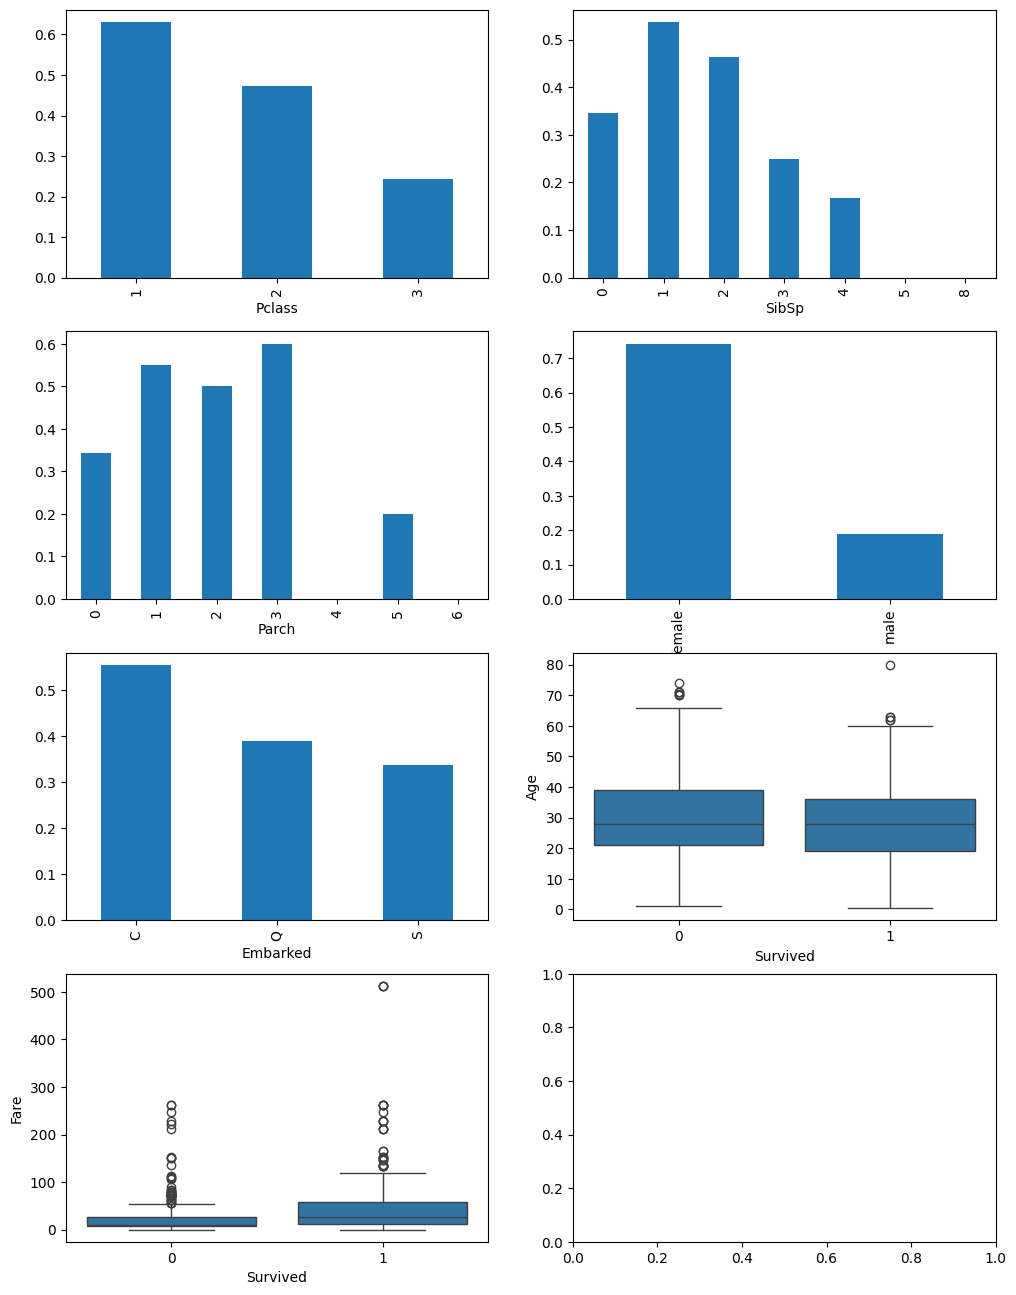

In [9]:
# I really don't wanna write another loop for this, this way is quicker for me :>
fig, ax = plt.subplots(4,2, figsize=(12,16))
df.groupby("Pclass")["Survived"].mean().plot(kind="bar", ax=ax[0,0])
df.groupby("SibSp")["Survived"].mean().plot(kind="bar", ax=ax[0,1])
df.groupby("Parch")["Survived"].mean().plot(kind="bar", ax=ax[1,0])
df.groupby("Sex")["Survived"].mean().plot(kind="bar", ax=ax[1,1])
df.groupby("Embarked")["Survived"].mean().plot(kind="bar", ax=ax[2,0])
sns.boxplot(x="Survived", y="Age", data=df, ax=ax[2,1])
sns.boxplot(x="Survived", y="Fare", data=df, ax=ax[3,0])
plt.show()

**Gender and Survival:**
- The survival rate for females is notably higher at around 75%, whereas for males, it's around 20%. This stark contrast suggests a strong relationship between gender and survival rates.

**Passenger Class (Pclass) and Survival:**
- The relationship between Pclass and survival is evident. Passengers in Pclass 1 had a better survival rate of approximately 60%, while those in Pclass 3 had the lowest survival rate at around 22%. This underscores the importance of class in determining survival outcomes.

**Fare and Survival:**
- There is a marginal relationship between fare and survival rates. Further investigation is needed to explore the nature of this relationship.

**Outlier in Fare:**
- It's worth noting the presence of an outlier in the "Fare" variable. This outlier may have an impact on the observed relationship with survival rates.

These initial bivariate analyses provide valuable insights into the relationships between specific variables and survival outcomes. Further exploration and potentially addressing outliers will enhance the depth of the analysis.


### Multivariate analysis

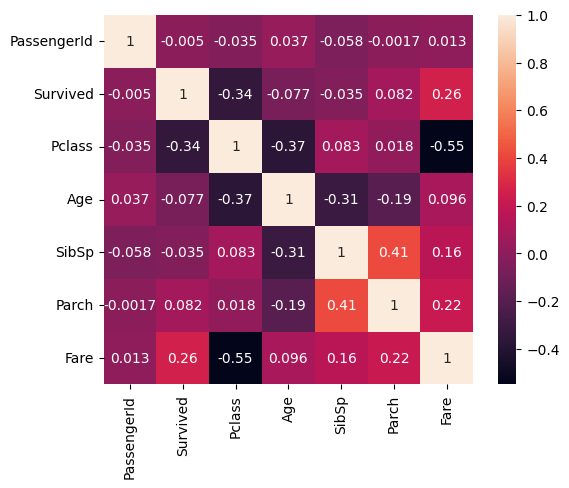

In [10]:
num_data = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[num_data].corr(), square=True, annot=True)
plt.Figure(figsize=(10,8))
plt.show()

**Significant Correlations:**

1. **Positive Correlation between Fare and Survived:**
   - There is a positive correlation between the fare paid and survival rates. Passengers who paid higher fares tended to have higher survival rates.

2. **Negative Correlation between Pclass and Survived:**
   - A negative correlation exists between the passenger class (Pclass) and survival. Passengers in lower classes (higher Pclass numbers) had lower survival rates.

3. **Negative Correlation between Fare and Pclass:**
   - There is a negative correlation between the fare paid and passenger class. Higher fares are associated with lower class numbers.

4. **Negative Correlation between Age and Pclass:**
   - A negative correlation is observed between passenger age and class. Older passengers tended to be in lower classes.

**Statistically Insignificant Correlations:**
- The correlations between the remaining variables are deemed statistically insignificant.

These findings provide valuable insights into the relationships between specific features and survival outcomes. The identified significant correlations can serve as important factors for further analysis and modeling.


## Feature Engineering and Data Cleaning

In [11]:
df['FamilyCount']= df.SibSp + df.Parch
df['title'] = df.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
df["Cabin_First"] = df.Cabin.str[0]

In [12]:
df['title'] = df['title'].apply(lambda x: x if pd.notna(x) and df['title'].value_counts()[x] >= 5 else "Other")
df.title.value_counts().reset_index()

,title,count
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Other,14
5,Dr.,7
6,Rev.,6


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,title,Cabin_First
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr.,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs.,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss.,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs.,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr.,NaN


In [14]:
# Replacing '0' fare outliers with Nan
print((df.Fare == 0).sum())
df.Fare = df.Fare.replace(0, np.NaN)
print((df.Fare == 0).sum())

15
0


In [15]:
# Replacing Null values with mean
df.Fare = df.Fare.fillna(df.Fare.mean())
df.Age = df.Age.fillna(df.Age.mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilyCount  891 non-null    int64  
 13  title        891 non-null    object 
 14  Cabin_First  204 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


*Most of the missing values have been replaced, Nothing can be done for the remaining missing values thus they will be ignored for the model.*

## Model Building


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['title_encoded'] = label_encoder.fit_transform(df['title'])


In [18]:
train_data = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare', 'FamilyCount', 'title_encoded']]
train_data = pd.concat([train_data, 
                        pd.get_dummies(df["Sex"].values), 
                        pd.get_dummies(df["Embarked"])],
                       axis=1, join='inner')
#train_data = train_data.astype(int)

In [19]:
train_data.isnull().sum()

Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
FamilyCount      0
title_encoded    0
female           0
male             0
C                0
Q                0
S                0
dtype: int64

In [20]:
train_data = train_data.dropna()

In [21]:
train_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,title_encoded,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,3,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,1,4,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,0,2,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,1,4,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,0,3,False,True,False,False,True


In [22]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logistic_grid = GridSearchCV(LogisticRegression(), param_grid=logistic_params, cv=5)
logistic_grid.fit(X_train, y_train)
print("Logistic Regression - Best Parameters:", logistic_grid.best_params_)

# RandomForestClassifier
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5)
rf_grid.fit(X_train, y_train)
print("Random Forest - Best Parameters:", rf_grid.best_params_)


# GradientBoostingClassifier
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), param_grid=gb_params, cv=5)
gb_grid.fit(X_train, y_train)
print("Gradient Boosting - Best Parameters:", gb_grid.best_params_)

C:\Users\91807\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91807\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Logistic Regression - Best Parameters: {'C': 0.1}
Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Gradient Boosting - Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [25]:
from sklearn.metrics import f1_score

# Logistic Regression
y_lc = logistic_grid.predict(X_test)
f1_lr = f1_score(y_test, y_lc)
print(f'F1 Score (Logistic Regression): {f1_lr:.4f}')

# Random Forest
y_rf = rf_grid.predict(X_test)
f1_rf = f1_score(y_test, y_lc)
print(f'F1 Score (Random Forest): {f1_rf:.4f}')

# Gradient Boosting
y_gb = gb_grid.predict(X_test)
f1_gb = f1_score(y_test, y_gb)
print(f'F1 Score (Gradient Boosting): {f1_gb:.4f}')


F1 Score (Logistic Regression): 0.7500
F1 Score (Random Forest): 0.7500
F1 Score (Gradient Boosting): 0.7571


*The Score achieved is pretty reasonable but we will try more advanced models to see if there is some scope for improvement*

### Trying more Advanced models

In [26]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()

classifier_stack = StackingClassifier(estimators=[
    ("logisitic", logistic_grid),
    ("rf", rf_grid),
    ("gb", gb_grid),
    ("xgb", xgb_model),
    ("lgbm", lgbm_model)
], final_estimator = logistic_grid)

# Fit and evaluate Stacking Classifier
classifier_stack.fit(X_train, y_train)
stacking_pred = classifier_stack.predict(X_test)
f1_stacking = f1_score(y_test, stacking_pred)
print("F1 Score (Stacking Classifier):", f1_stacking)


C:\Users\91807\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91807\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 217
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\91807\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91807\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [27]:
classifier_voting = VotingClassifier(estimators=[
    ("logisitic", logistic_grid),
    ("rf", rf_grid),
    ("gb", gb_grid),
    ("xgb", xgb_model),
    ("lgbm", lgbm_model)
], voting="hard")

classifier_voting.fit(X_train, y_train)
voting_pred = classifier_voting.predict(X_test)
f1_voting = f1_score(voting_pred, y_test)
print("F1 Score (Voting Classifier):", f1_voting)

C:\Users\91807\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91807\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 217
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

### F1 Score Summary

- **Logistic Regression:** 0.7500
- **Random Forest:** 0.7500
- **Gradient Boosting:** 0.7571
- **Stacking Classifier:** 0.8028
- **Voting Classifier:** 0.7692

These F1 scores represent the model performance in terms of precision and recall, with higher values indicating better overall model effectiveness. The Stacking Classifier achieved the highest F1 score among the models evaluated, demonstrating strong predictive capabilities. <br>
**We will choose the 'Stacking Classifier' as our final model.**

In [36]:
from joblib import dump

dump(label_encoder, "..\model\label_encoder.pkl")
dump(classifier_stack, "..\model\model.pkl")

['..\\model\\model.pkl']